# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 604


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [8]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&units={units}&q="

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url + city).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | port-aux-francais
Processing Record 2 of Set 1 | albany
Processing Record 3 of Set 1 | adamstown
Processing Record 4 of Set 1 | ust-nera
Processing Record 5 of Set 1 | ushuaia
Processing Record 6 of Set 1 | aykhal
Processing Record 7 of Set 1 | west island
Processing Record 8 of Set 1 | puerto natales
Processing Record 9 of Set 1 | gaspe
Processing Record 10 of Set 1 | yellowknife
Processing Record 11 of Set 1 | tura
Processing Record 12 of Set 1 | ta`u
Processing Record 13 of Set 1 | aleksandrovsk-sakhalinskiy
Processing Record 14 of Set 1 | cabo san lucas
Processing Record 15 of Set 1 | peace river
Processing Record 16 of Set 1 | thinadhoo
Processing Record 17 of Set 1 | puerto ayora
Processing Record 18 of Set 1 | iqaluit
Processing Record 19 of Set 1 | say
Processing Record 20 of Set 1 | margaret river
Processing Record 21 of Set 1 | selfoss
Processing Record 22 of Set 1 | bokkos
Processing R

In [9]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          582
Lat           582
Lng           582
Max Temp      582
Humidity      582
Cloudiness    582
Wind Speed    582
Country       582
Date          582
dtype: int64

In [10]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,port-aux-francais,-49.3500,70.2167,2.58,88,91,12.55,TF,1720412813
1,albany,42.6001,-73.9662,21.44,85,0,1.25,US,1720412814
2,adamstown,-25.0660,-130.1015,20.04,69,100,9.92,PN,1720412815
3,ust-nera,64.5667,143.2000,16.48,51,30,2.69,RU,1720412633
4,ushuaia,-54.8000,-68.3000,2.81,81,40,7.72,AR,1720412634


In [12]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [13]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,port-aux-francais,-49.3500,70.2167,2.58,88,91,12.55,TF,1720412813
1,albany,42.6001,-73.9662,21.44,85,0,1.25,US,1720412814
2,adamstown,-25.0660,-130.1015,20.04,69,100,9.92,PN,1720412815
3,ust-nera,64.5667,143.2000,16.48,51,30,2.69,RU,1720412633
4,ushuaia,-54.8000,-68.3000,2.81,81,40,7.72,AR,1720412634


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

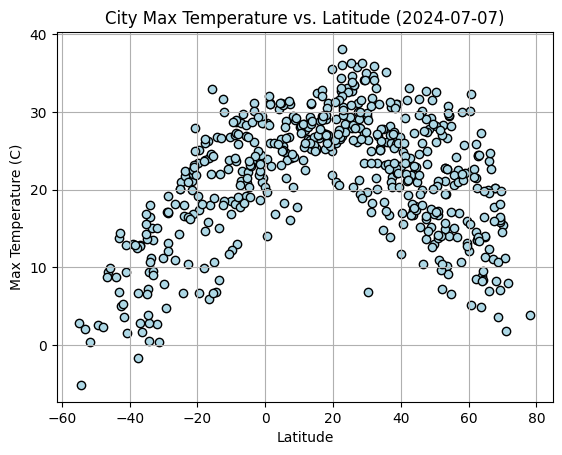

In [32]:
# Build scatter plot for latitude vs. temperature
x_values_lat = city_data_df['Lat']
y_values_max_temp = city_data_df['Max Temp']
plt.scatter(x_values_lat,y_values_max_temp,color=(0.678, 0.847, 0.902),edgecolors="black")


# Incorporate the other graph properties
plt.title('City Max Temperature vs. Latitude (2024-07-07)')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

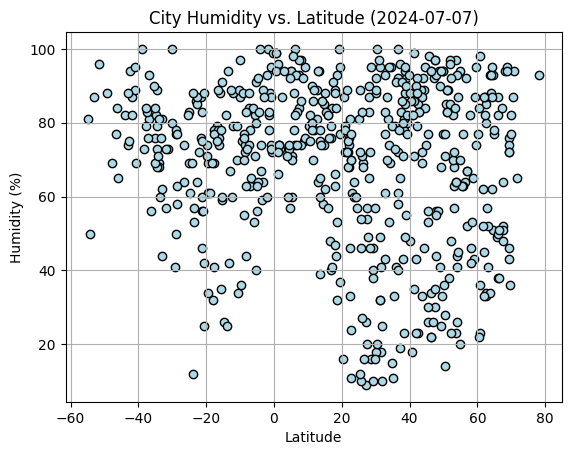

In [33]:
# Build the scatter plots for latitude vs. humidity
x_values_lat = city_data_df['Lat']
y_values_humidity = city_data_df['Humidity']
plt.scatter(x_values_lat,y_values_humidity,color=(0.678, 0.847, 0.902),edgecolors="black")

# Incorporate the other graph properties
plt.title('City Humidity vs. Latitude (2024-07-07)')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

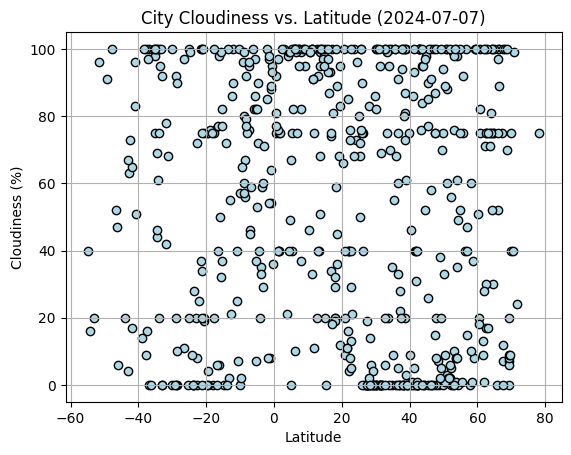

In [34]:
# Build the scatter plots for latitude vs. cloudiness
x_values_lat = city_data_df['Lat']
y_values_cloudiness = city_data_df['Cloudiness']
plt.scatter(x_values_lat,y_values_cloudiness,color=(0.678, 0.847, 0.902),edgecolors="black")

# Incorporate the other graph properties
plt.title('City Cloudiness vs. Latitude (2024-07-07)')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

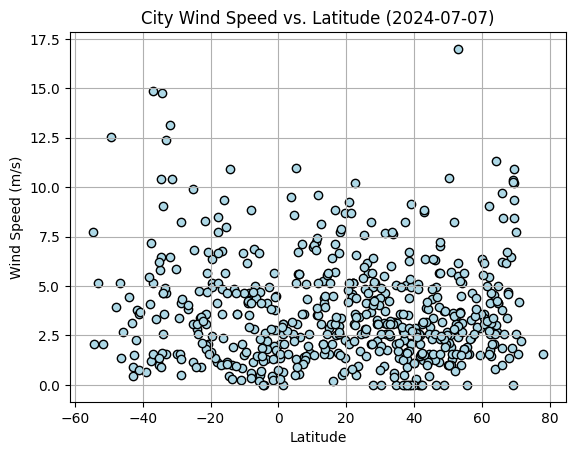

In [37]:
# Build the scatter plots for latitude vs. wind speed
x_values_lat = city_data_df['Lat']
y_values_wind_speed = city_data_df['Wind Speed']
plt.scatter(x_values_lat,y_values_wind_speed,color=(0.678, 0.847, 0.902),edgecolors="black")

# Incorporate the other graph properties
plt.title('City Wind Speed vs. Latitude (2024-07-07)')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [39]:
# Define a function to create Linear Regression plots
def linear_regression(x_values, y_values, x_label, y_label, x_annotate, y_annotate):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,(x_annotate,y_annotate),fontsize=15,color="red")
    plt.title(f"{y_label} vs {x_label}")
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    print(f"The r^2-value is: {rvalue**2}")
    plt.show()

In [44]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,albany,42.6001,-73.9662,21.44,85,0,1.25,US,1720412814
3,ust-nera,64.5667,143.2000,16.48,51,30,2.69,RU,1720412633
5,aykhal,66.0000,111.5000,23.70,38,100,9.68,RU,1720412636
8,gaspe,48.8334,-64.4819,15.12,94,0,0.00,CA,1720412639
9,yellowknife,62.4560,-114.3525,20.23,85,75,2.57,CA,1720412640


In [56]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,port-aux-francais,-49.3500,70.2167,2.58,88,91,12.55,TF,1720412813
2,adamstown,-25.0660,-130.1015,20.04,69,100,9.92,PN,1720412815
4,ushuaia,-54.8000,-68.3000,2.81,81,40,7.72,AR,1720412634
6,west island,-12.1568,96.8225,29.99,79,90,3.60,CC,1720412820
7,puerto natales,-51.7236,-72.4875,0.32,96,96,2.07,CL,1720412821


###  Temperature vs. Latitude Linear Regression Plot

The r^2-value is: 0.32060387237999305


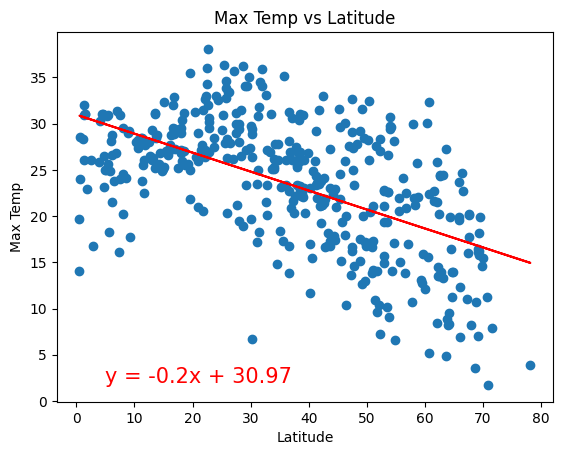

In [58]:
# Linear regression on Northern Hemisphere
linear_regression(northern_hemi_df['Lat'], northern_hemi_df['Max Temp'], 'Latitude', 'Max Temp', 5.0, 2.0)

The r^2-value is: 0.5695851766730233


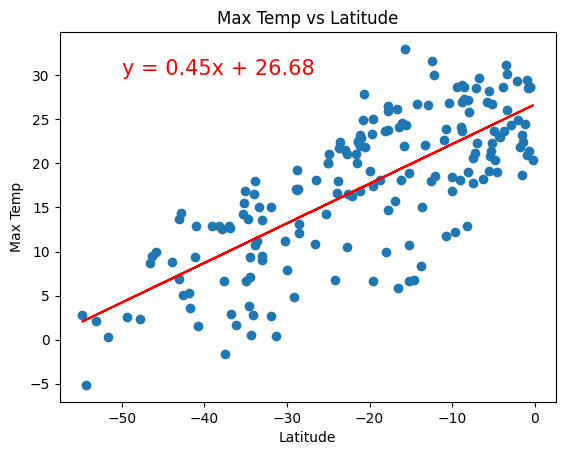

In [59]:
# Linear regression on Southern Hemisphere
linear_regression(southern_hemi_df['Lat'], southern_hemi_df['Max Temp'], 'Latitude', 'Max Temp', -50.0, 30.0)

### Humidity vs. Latitude Linear Regression Plot

The r^2-value is: 0.01386581127956266


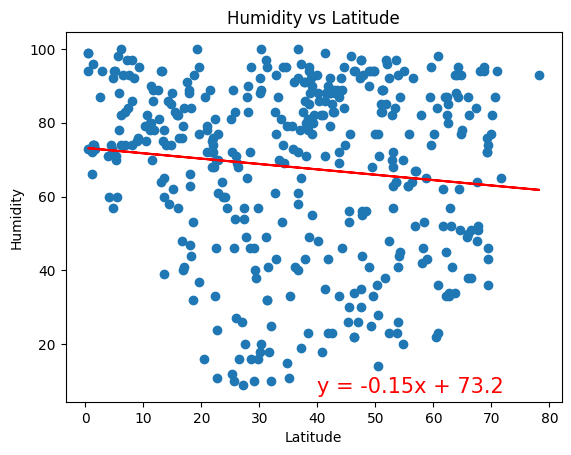

In [73]:
# Northern Hemisphere
linear_regression(northern_hemi_df['Lat'], northern_hemi_df['Humidity'], 'Latitude', 'Humidity', 40.0, 7.0)

The r^2-value is: 0.0033702435876343147


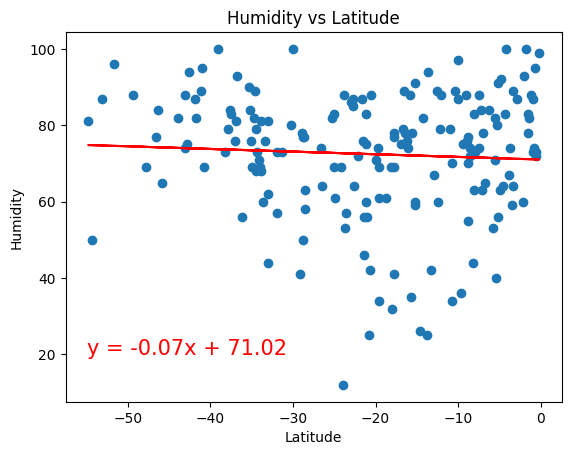

In [74]:
# Southern Hemisphere
linear_regression(southern_hemi_df['Lat'], southern_hemi_df['Humidity'], 'Latitude', 'Humidity', -55.0, 20.0)

**Discussion about the linear relationship:** There is nearly no relationship between humidity and latitude as the r-squared for both northern and southern hemispheres is less than 2%.

### Cloudiness vs. Latitude Linear Regression Plot

The r^2-value is: 0.02546285166686008


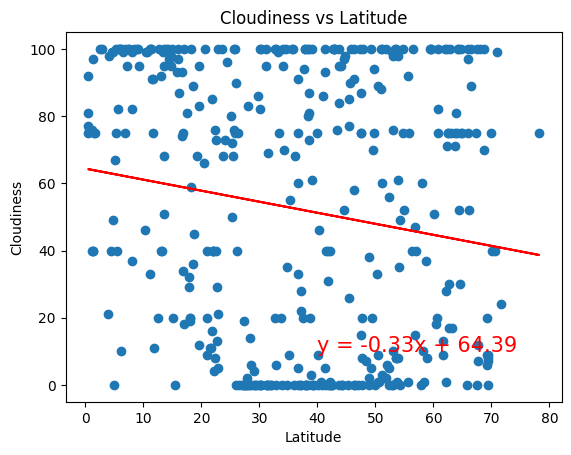

In [75]:
# Northern Hemisphere
linear_regression(northern_hemi_df['Lat'], northern_hemi_df['Cloudiness'], 'Latitude', 'Cloudiness', 40.0, 10.0)

The r^2-value is: 0.00798767235494739


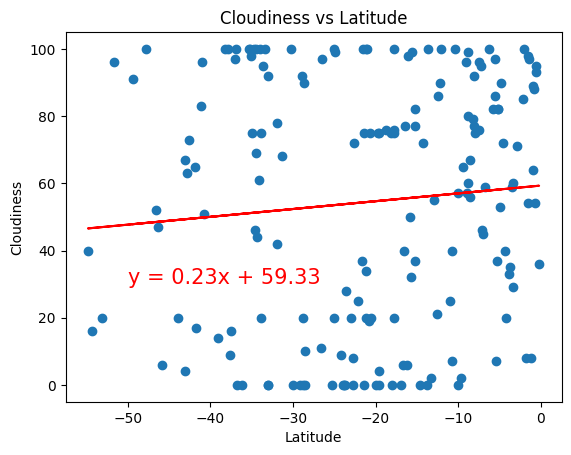

In [76]:
# Southern Hemisphere
linear_regression(southern_hemi_df['Lat'], southern_hemi_df['Cloudiness'], 'Latitude', 'Cloudiness', -50.0, 30.0)

**Discussion about the linear relationship:** There is nearly no relationship between cloudiness and latitude as the r-squared for both northern and southern hemispheres is less than 3%.

### Wind Speed vs. Latitude Linear Regression Plot

The r^2-value is: 0.0012729354307679391


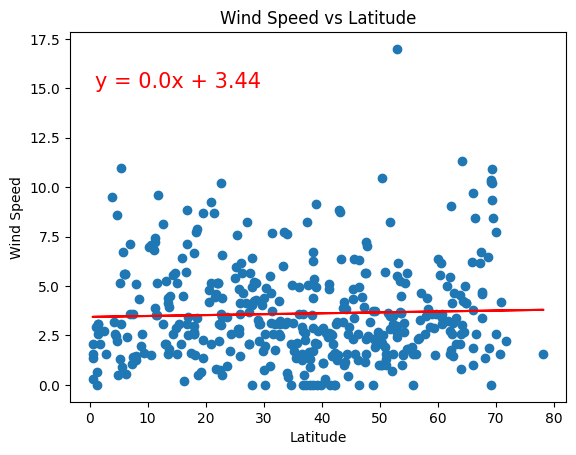

In [79]:
# Northern Hemisphere
linear_regression(northern_hemi_df['Lat'], northern_hemi_df['Wind Speed'], 'Latitude', 'Wind Speed', 1.0, 15.0)

The r^2-value is: 0.045115538244842705


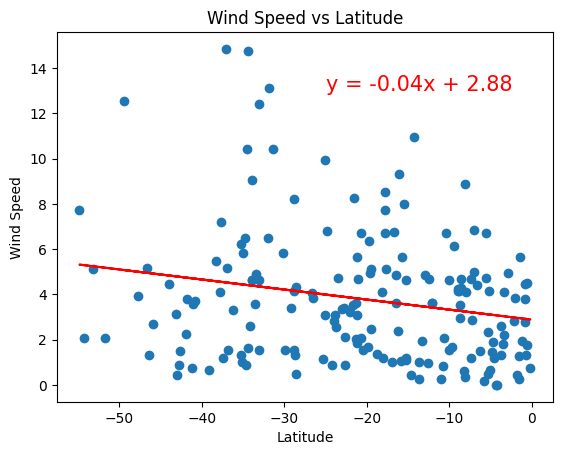

In [81]:
# Southern Hemisphere
linear_regression(southern_hemi_df['Lat'], southern_hemi_df['Wind Speed'], 'Latitude', 'Wind Speed', -25.0, 13.0)

**Discussion about the linear relationship:** There is nearly no relationship between wind speed and latitude as the r-squared for both northern and southern hemispheres is less than 5%.